# 微分方程

## 微分方程求解法一之解析方法

使用Python求解下列微分方程的解析解

$$
\begin{equation*}
\frac{dy}{dx} = 1 + y^2, \quad y(0) = 1
\tag{1.1}
\end{equation*}
$$

In [1]:
# 求解(1.1)微分方程

from sympy import symbols, Function, Eq, dsolve, Eq

x = symbols('x')
y = Function('y')(x)
diff_eq = Eq(y.diff(x), 1 + y**2)
general_sol = dsolve(diff_eq, y)
specific_sol = dsolve(diff_eq, y, ics={y.subs(x, 0): 1})

print(f"general solution: {general_sol}")
print(f"specific solution: {specific_sol}")

general solution: Eq(y(x), -tan(C1 - x))
specific solution: Eq(y(x), tan(x + pi/4))


$$
\begin{equation*}
y'' - 2y' - 3y = 0, \quad y(0) = 1, \quad y'(0) = 0
\tag{1.2}
\end{equation*}
$$

In [2]:
# 求解(1.2)微分方程

y = Function('y')(x)
diff_eq_2nd_order = Eq(y.diff(x, x) - 2 * y.diff(x) - 3 * y, 0)
specific_sol_2nd_order = dsolve(diff_eq_2nd_order, y, ics={y.subs(x, 0): 1, y.diff(x).subs(x, 0): 0})

print(f"specific solution for 2nd order diff eq: {specific_sol_2nd_order}")

specific solution for 2nd order diff eq: Eq(y(x), exp(3*x)/4 + 3*exp(-x)/4)


$$
\begin{equation*}
x''(t) - (1 - x^2(t))x'(t) + x(t) = 0, \quad x(0) = 3, \quad x'(0) = 0
\tag{1.3}
\end{equation*}
$$

In [ ]:
# 求解(1.3)微分方程

t = symbols('t')
x = Function('x')(t)

nonlinear_diff_eq = Eq(x.diff(t, t) - (1 - x ** 2) * x.diff(t) + x, 0)

specific_sol_nonlinear = dsolve(nonlinear_diff_eq, x, ics={x.subs(t, 0): 3, x.diff(t).subs(t, 0): 0})

print(f"specific solution for nonlinear diff eq: {specific_sol_nonlinear}")

# 注意该方程无解析解

$$
\begin{equation*}
x'^2(t) + x^2(t) = 1, \quad x(0) = 0
\tag{1.4}
\end{equation*}
$$

In [ ]:
# 求解(1.4)微分方程

t = symbols('t')
x = Function('x')(t)

nonlinear_diff_eq_2 = Eq(x.diff(t) ** 2 + x ** 2, 1)

specific_sol_nonlinear_2 = dsolve(nonlinear_diff_eq_2, x, ics={x.subs(t, 0): 0})

print(f"specific solution for nonlinear diff eq 2: {specific_sol_nonlinear_2}")

# 注意对于非线性微分方程，通常无法求得解析解，因此需要数值方法求解

$$
\begin{equation*}
\left\{
\begin{array}{l}
\frac{dx}{dt} = 3x + 4y \\
\frac{dy}{dt} = -4x + 3y
\end{array}
\right., \quad 
\left\{
\begin{array}{l}
x(0) = 0 \\
y(0) = 1
\end{array}
\right.
\tag{1.5}
\end{equation*}
$$

In [3]:
# 求解(1.5)微分方程

t = symbols('t')
x = Function('x')(t)
y = Function('y')(t)

diff_eq_1 = Eq(x.diff(t), 3 * x + 4 * y)
diff_eq_2 = Eq(y.diff(t), -4 * x + 3 * y)

specific_sol = dsolve([diff_eq_1, diff_eq_2], ics={x.subs(t, 0): 0, y.subs(t, 0): 1})

print(f"specific solution: {specific_sol}")

specific solution: [Eq(x(t), exp(3*t)*sin(4*t)), Eq(y(t), exp(3*t)*cos(4*t))]


## 微分方程求解法

当无法找到解析解时，通常的做法是转向**数值求解**方法。数值求解微分方程涉及使用数值方法（如**欧拉方法**、**龙格-库塔方法**等）来逼近方程的解。Python中，我们可以使用`scipy.integrate.solve_ivp`这样的函数来数值求解微分方程。

这需要我们将微分方程表述为一个**一阶微分方程组**，因为`solve_ivp`只能解决一阶微分方程。对于高阶微分方程，我们可以通过**引入新变量**来将其转化为一阶微分方程组。

例如，对于方程 $ x''(t) - (1 - x^2(t))x'(t) + x(t) = 0, \quad x(0) = 3, \quad x'(0) = 0 $，我们可以引入新变量 $ v(t) = x'(t) $，那么原方程就可以表示为两个一阶方程：

$$
\begin{align*}
v'(t) & = (1 - x^2(t))v(t) - x(t) \\
x'(t) & = v(t)
\end{align*}
$$

这样我们就可以使用数值方法来求解 $ x(t) $ 和 $ v(t) $。

In [4]:
# 使用数值方法求解非线性微分方程

from scipy.integrate import solve_ivp
import numpy as np

# 定义原始方程右侧的函数
def ode_system(t, y):
    x, v = y  # y[0] 是 x(t)，y[1] 是 v(t) = x'(t)
    dxdt = v  # x'(t) = v(t)
    dvdt = (1 - x**2) * v - x  # 原方程转化为一阶方程组
    return [dxdt, dvdt]

# 初始条件
x0 = 3
v0 = 0  # x'(0) = v(0)
initial_conditions = [x0, v0]

# 定义时间区间：从 0 到 10
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 100)  # 生成时间点以评估解

# 使用 solve_ivp 数值求解
sol = solve_ivp(ode_system, t_span, initial_conditions, t_eval=t_eval)

# 检查求解器是否成功找到解
if sol.success:
    # 解已成功找到
    t_vals = sol.t
    x_vals = sol.y[0]
    v_vals = sol.y[1]
else:
    t_vals = x_vals = v_vals = "No solution found"

print(f"t: {t_vals}")
print(f"x: {x_vals}")
print(f"v: {v_vals}")

t: [ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818

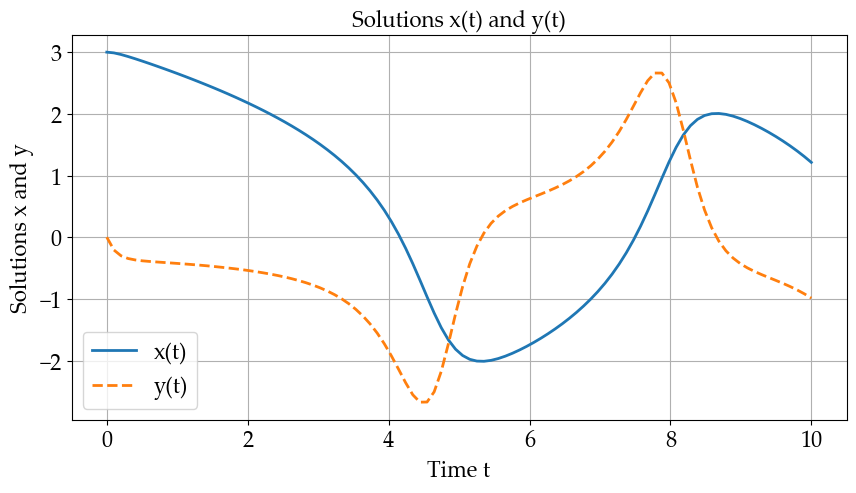

In [5]:
# 绘制解的图像
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Palatino Linotype'

plt.figure(figsize=(10, 5))

plt.plot(sol.t, sol.y[0], label='x(t)', linewidth=2)
plt.plot(sol.t, sol.y[1], label="y(t)", linestyle='--', linewidth=2)
plt.title('Solutions x(t) and y(t)', fontsize=16)
plt.xlabel('Time t', fontsize=16)
plt.ylabel('Solutions x and y', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.legend(fontsize=16)
plt.show()

Let's look at the Lorenz model

The Lorenz system equations:
$$
\begin{aligned}
\frac{dx}{dt} &= \sigma (y - x), \\
\frac{dy}{dt} &= x (\rho - z) - y, \\
\frac{dz}{dt} &= xy - \beta z.
\end{aligned}
$$

And the parameters used:
$$
\sigma = 10, \quad \beta = \frac{8}{3}, \quad \rho = 28.
$$

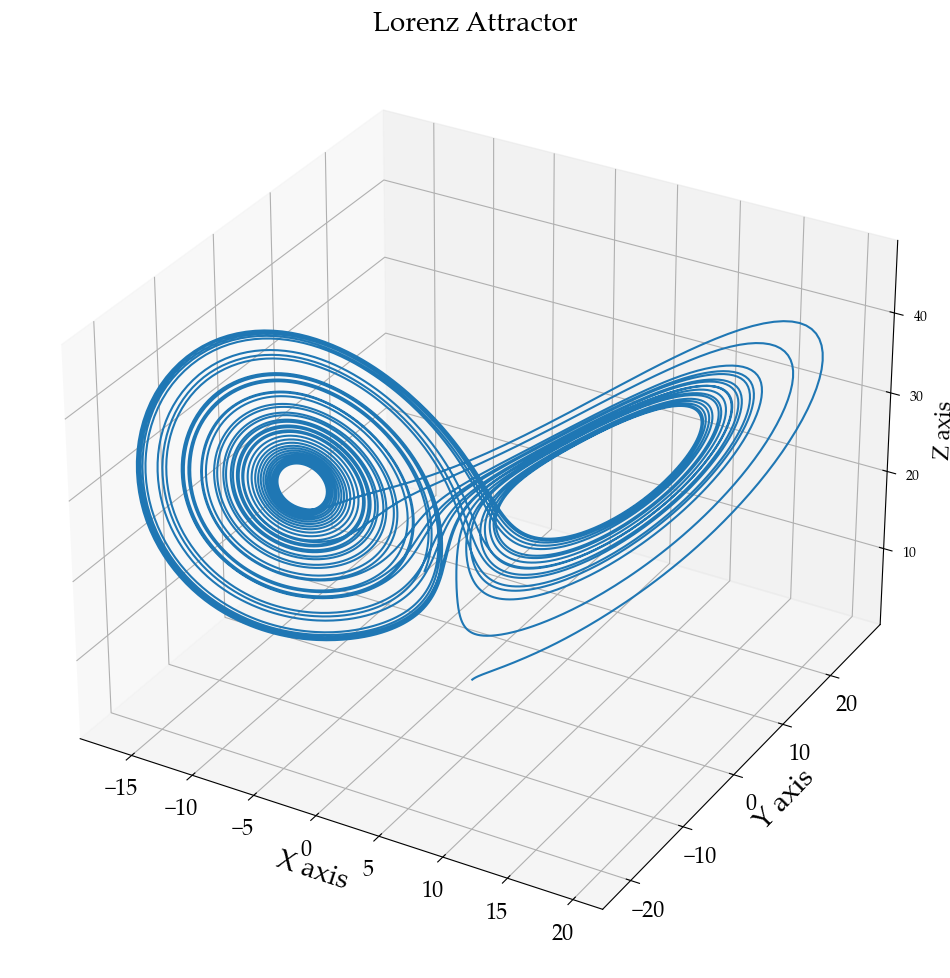

In [6]:
# 使用数值方法求解Lorenz模型

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import numpy as np

sigma = 10
beta = 8 / 3
rho = 28

def lorenz(t, X):
    x, y, z = X
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

X0 = [1.0, 1.0, 1.0]  
t_span = (0, 40)  
t_eval = np.linspace(*t_span, num=10000) 

sol = solve_ivp(lorenz, t_span, X0, t_eval=t_eval)

fig = plt.figure(figsize=(12, 15))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2])
ax.set_xlabel('X axis', fontsize=20)
ax.set_ylabel('Y axis', fontsize=20)
ax.set_zlabel('Z axis', fontsize=16)
ax.set_title('Lorenz Attractor', fontsize=20)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)

plt.show()
